### Most popular restaurants categories

In this section we mainly focused on finding the top ten popular restaurant categories
* We used Spark for data preprocessing. 
    * Extract the categories from restaurants data  
    * Filter out the keyword "Restaurants" and "Food" becasue these two words show up the most and they don't give us any information
    * Map reduce to check how many times each category appears 
    * Convert RDD to a dataframe
* Store the dataframe to a csv file for later use
* Use `pandas` and `matplotlib` to load and visualize the data
    * Read the preprocessed  data
    * Extract the top ten restaurant categories
    * Plot the data for visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/popular-categories/part-00000-37ac426b-42dc-4e24-8981-10b48908a1a3-c000.csv')

#### We took out the top ten restaurant categories
As we can see, Nightlife is the most popular category in restaurant business.


In [3]:
data.head(10)

,name,count
0,Nightlife,14211
1,Bars,12400
2,Coffee & Tea,8415
3,Fast Food,8106
4,Sandwiches,8064
5,American (Traditional),7596
6,Pizza,7302
7,Breakfast & Brunch,6225
8,Burgers,6107
9,Specialty Food,5253


From the graph we can see that Nightlife is the most popular business category.

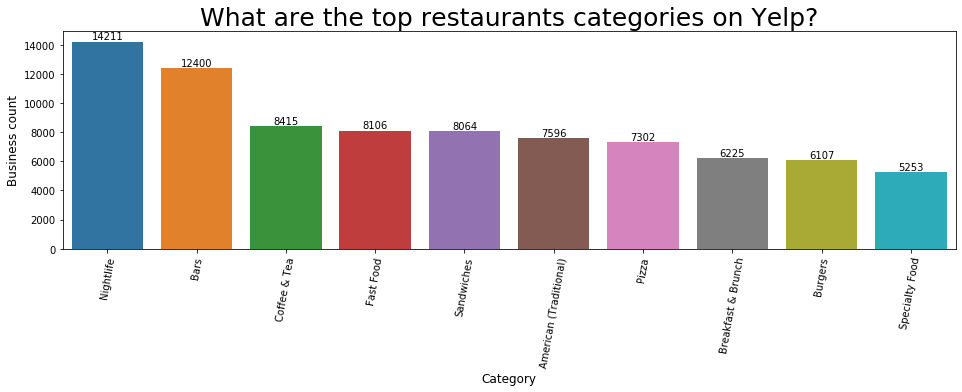

<Figure size 432x288 with 0 Axes>

In [4]:
x = data.head(10)
plt.figure(figsize=(16,4))
ax = sns.barplot(x='name', y='count', data = x)
plt.title("What are the top restaurants categories on Yelp?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Business count', fontsize=12)
plt.xlabel('Category', fontsize=12)

rects = ax.patches
labels = x['count']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 6, label, ha='center', va='bottom')
plt.show()
plt.savefig("top")

### 3. Reasons

* Finding the top catagories is exactly a map reduce process, using Spark simplifies this process
* `pandas` is good for visualization

### Analyze tips for some of the popular restaurants

Yelp has a lot of popular restaurants. Let's analyse some of the popular restaurants. 

In this dataset, `tips` are written by a user on a business which are shorter than reviews and tend to convey quick suggestions.

In this part, we'll see the top ten restaurant's tips word cloud and some of the popular restaurant's tips word cloud.

* Use Spark to do data preprocessing 
    1. Parse the data
    2. Create dataframes for both business and tips
    3. Join the two table together to get the tips for the target restaurants 
    4. Use the preprocess function to take out the stopwords and other unwanted words
* Use wordcloud library to visualize the data

In [6]:
def make_plot(filename, title):
    wc = WordCloud(width=1400, height=600, random_state=1, max_words=200000000)

    data = pd.read_csv(filename, header=None)
    data.columns = ["text_clear"]
    wc.generate(str(data['text_clear']))
    plt.figure(figsize=(20,10), facecolor='k')
    
    plt.title(title, fontsize=30,color='white')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)
    plt.show()

#### Tips for top ten reviewed restaurants

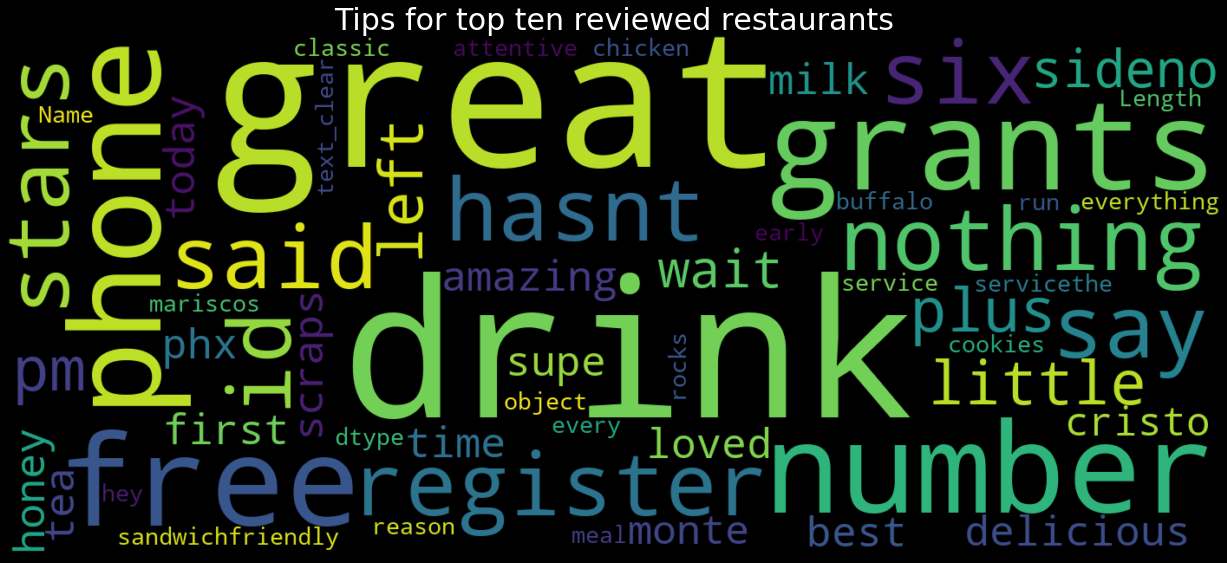

In [7]:
filename_top_ten = './data/top_ten_res_tips/part-00000'
make_plot(filename_top_ten, "Tips for top ten reviewed restaurants")

We can see that "great", "drink", "free" are some popular words in these top ten reviewed restaurants.

#### Tips for Little Miss BBQ (The most popular restaurant)

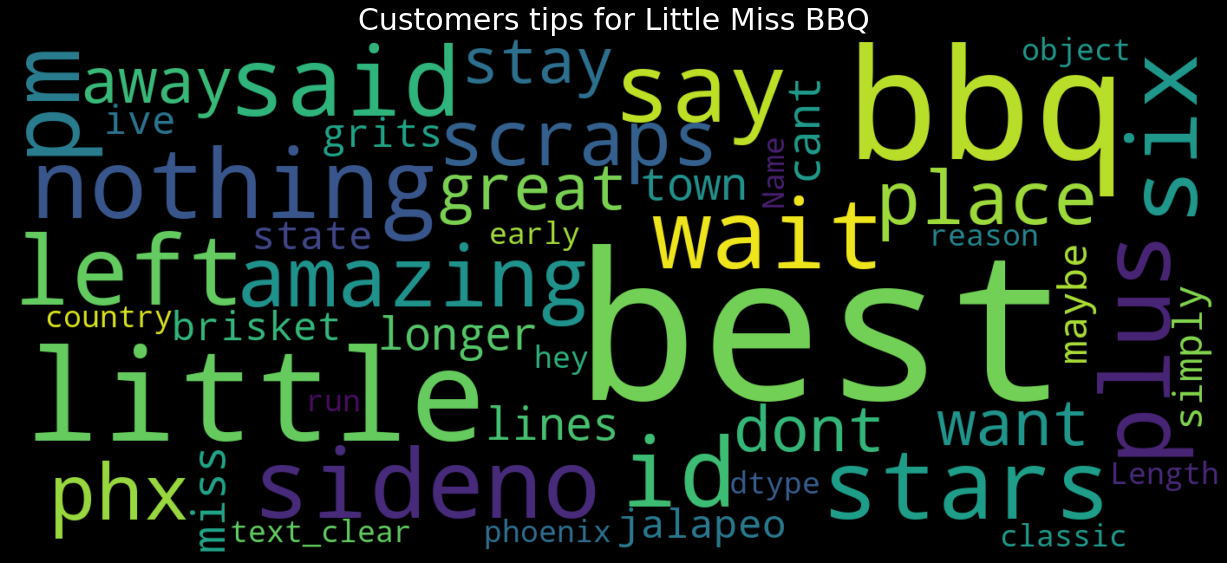

In [8]:
filename_3 = './data/Little_Miss_BBQ_tip/part-00000'
make_plot(filename_3, "Customers tips for Little Miss BBQ")

#### Tips for Bacchanal Buffet (the restaurant that has the most review)

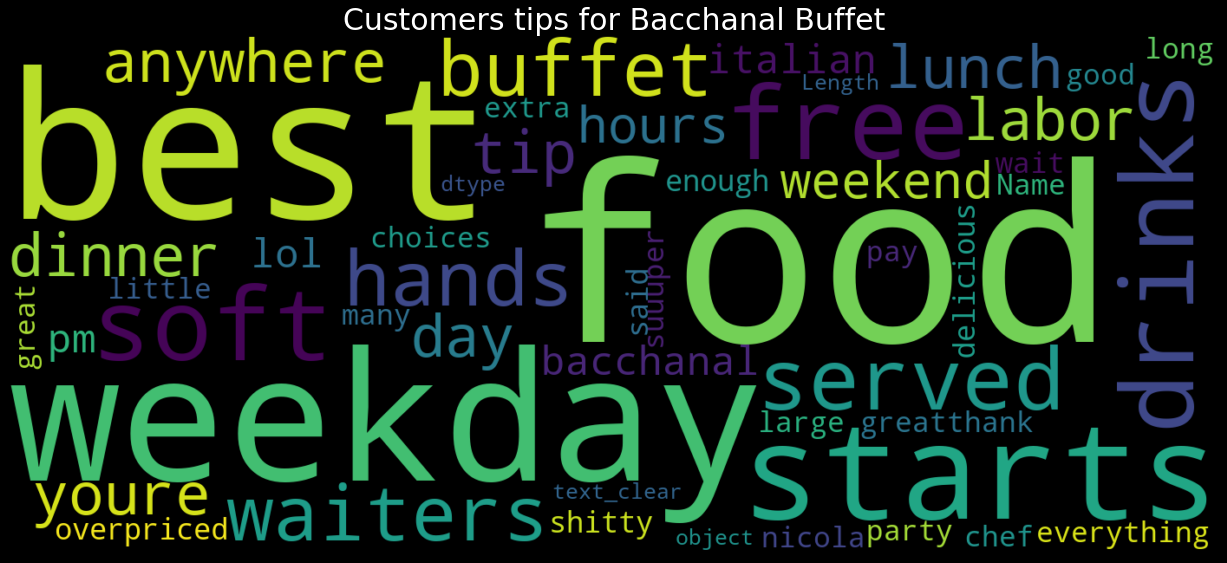

In [9]:
filename_4 = './data/Bacchanal Buffet/part-00000'
make_plot(filename_4, "Customers tips for Bacchanal Buffet")

### 3. Reasons

* Spark's dataframe can be easily converted to RDD
* Spark can deal with very big data which guarantees scalability
* wordcloud is a great representation for sentence analysis

### Problems
What problems did you encounter while attacking the problem? How did you solve them?

When process the tips data, we found there are many unwanted words that don't provide much insight, for example "a", "the", "this", "that". We also need to filter out all the punctuation in order to make the wordcloud.  
We used the library "STOPWORDS" to filter out the unwanted words and punctuations plus some self defined words.

### Rating distribution in Las Vegas

In this section we use map to visualize the rating distribution in Las Vegas
* Use Spark to extract the data for Las Vegas
* Take only restaurant with review count greater than 500
* Use `plotly.express` to load the map
* Use different color to represent the rating distribution

In [34]:
import pandas as pd
import plotly.express as px
import requests

In [35]:
mapbox_token = 'pk.eyJ1IjoieGlhb2Jhb3Nhbmd1byIsImEiOiJja2hlMjJ0N3MwMTB4MnFxZWFrZWdoa2NmIn0.cwqsW5Zfj_ZOBtun0yQz4A'
px.set_mapbox_access_token(mapbox_token)

In [60]:
LasVegas = pd.read_csv('./data/las_vegas/part-00000-392ab77d-ed11-48dc-b5ab-720b303c0c12-c000.csv', \
                      names=['name','stars','review_count','latitude','longitude','city'])

In [61]:
LasVegas.head()

,name,stars,review_count,latitude,longitude,city
0,Motown Extreme,4.5,54,36.099744,-115.167493,Las Vegas
1,Subway Restaurants,2.5,33,36.283824,-115.287021,Las Vegas
2,Fiesta Filipina Cuisine,3.5,107,36.054100,-115.278063,Las Vegas
3,Filipino Fast Food & Asian Market,3.5,11,36.021308,-115.126616,Las Vegas
4,888 Noodle Bar,3.0,37,36.134582,-115.151610,Las Vegas


In [51]:
LasVegas_review_greater = LasVegas[LasVegas.review_count > 500]

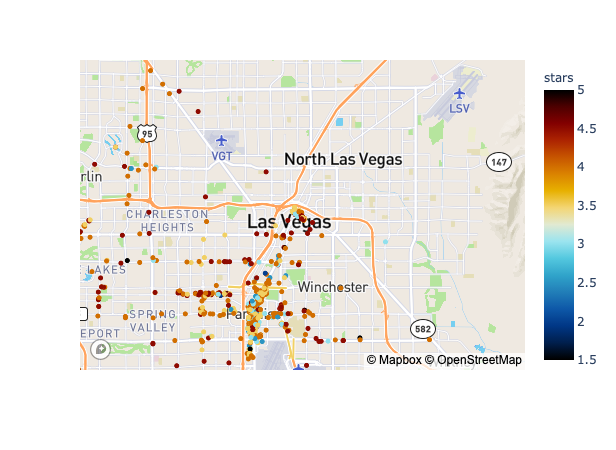

In [52]:
fig1 = px.scatter_mapbox(LasVegas_review_greater,lat='latitude',lon='longitude',hover_name='name', hover_data=['stars','city','review_count'],\
                        color="stars",size_max=20, zoom=10, color_continuous_scale=px.colors.cyclical.IceFire,\
                        center=dict(lat=36.1699,lon=-115.1398))

fig1.update_layout(mapbox_style='streets',mapbox_accesstoken=mapbox_token)
fig1.show()

In [40]:
LasVegas_star_greater = LasVegas_review_greater[LasVegas_review_greater.stars > 4]

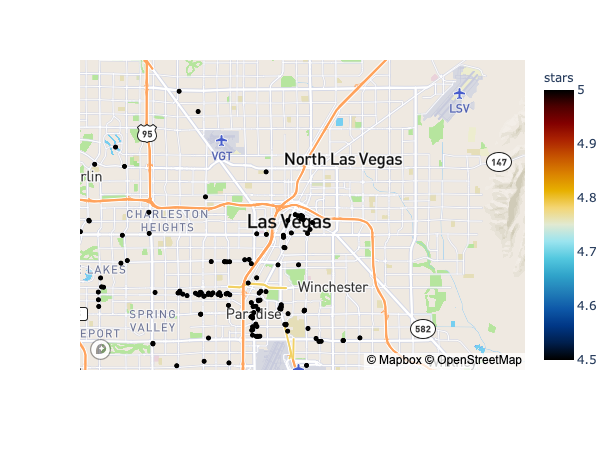

In [41]:
fig2 = px.scatter_mapbox(LasVegas_star_greater,lat='latitude',lon='longitude',hover_name='name', hover_data=['stars','city','review_count'],\
                        color="stars",size_max=20, zoom=10, color_continuous_scale=px.colors.cyclical.IceFire,\
                        center=dict(lat=36.1699,lon=-115.1398))

fig2.update_layout(mapbox_style='streets',mapbox_accesstoken=mapbox_token)
fig2.show()

### 3. Findings

* Most of the popular restaurants are in the Strip, which means location place a big role in how people rate restaurants.
